In [1]:
import pandas as pd
import numpy as np
import vaex as vx
import matplotlib.pyplot as plt
import seaborn as sns
import time
from multiprocessing import Process
import gc

plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.max_colwidth", 9999)
vx.settings.display.max_columns = 200
vx.settings.display.max_rows = 100
vx.settings.max_colwidth=60000
pd.set_option('display.float_format',lambda x : '%.4f' % x)
np.set_printoptions(suppress=True) #
pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline

In [ ]:
'''
catplot():
1.stripplot()  category scatte 
2.swarmplot()  Categorical scatter plot of distribution density 分布密度的分类散点图
3.boxplot()
4.violinplot() 小提琴图
5.boxenplot() 增强箱图
6.pointplot()
7.barplot()
8.countplot()

sns.catplot(x=None,y=None,hue=None,data=None,row=None,col=None,col_wrap=None,estimator=<function mean>,ci=95,
n_boot=1000,units=None,order=None,hue_order=None,row_order=None,col_order=None,kind='strip',height=5,aspect=1,
orient=None,color=None,palette=None,legend=True,legend_out=True,sharex=True,sharey=True,margin_titles=False,facet_kws=None,**kwargs)
data:

x,y: 
row,col: 设置分类变量将决定网格的分面
kind: count-   point-  bar- strip- swarm-群形  box- violin-  boxen-
col_wrap:  muli rows
orient: v or h  
'''

In [3]:
path = '../data/'
csv_name = 'exercise.csv'
df = pd.read_csv(path+csv_name)

In [4]:
print(df.shape)
print(df.columns)
df.head(2)

(90, 6)
Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')


,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest


In [5]:
df.dtypes

Unnamed: 0     int64
id             int64
diet          object
pulse          int64
time          object
kind          object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  90 non-null     int64 
 1   id          90 non-null     int64 
 2   diet        90 non-null     object
 3   pulse       90 non-null     int64 
 4   time        90 non-null     object
 5   kind        90 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.3+ KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
id            0
diet          0
pulse         0
time          0
kind          0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,id,pulse
count,90.0000,90.0000,90.0000
mean,44.5000,15.5000,99.7000
std,26.1247,8.7039,14.8585
min,0.0000,1.0000,80.0000
25%,22.2500,8.0000,90.2500
50%,44.5000,15.5000,96.0000
75%,66.7500,23.0000,103.0000
max,89.0000,30.0000,150.0000


In [9]:
df.describe(include='all')

,Unnamed: 0,id,diet,pulse,time,kind
count,90.0000,90.0000,90,90.0000,90,90
unique,NaN,NaN,2,NaN,3,3
top,NaN,NaN,low fat,NaN,1 min,rest
freq,NaN,NaN,45,NaN,30,30
mean,44.5000,15.5000,NaN,99.7000,NaN,NaN
std,26.1247,8.7039,NaN,14.8585,NaN,NaN
min,0.0000,1.0000,NaN,80.0000,NaN,NaN
25%,22.2500,8.0000,NaN,90.2500,NaN,NaN
50%,44.5000,15.5000,NaN,96.0000,NaN,NaN
75%,66.7500,23.0000,NaN,103.0000,NaN,NaN


In [11]:
df.diet.value_counts()

diet
low fat    45
no fat     45
Name: count, dtype: int64

In [12]:
df.time.value_counts()

time
1 min     30
15 min    30
30 min    30
Name: count, dtype: int64

In [13]:
df.kind.value_counts()

kind
rest       30
walking    30
running    30
Name: count, dtype: int64

In [14]:
df.time.describe()

count        90
unique        3
top       1 min
freq         30
Name: time, dtype: object

In [15]:
df.kind.describe()

count       90
unique       3
top       rest
freq        30
Name: kind, dtype: object

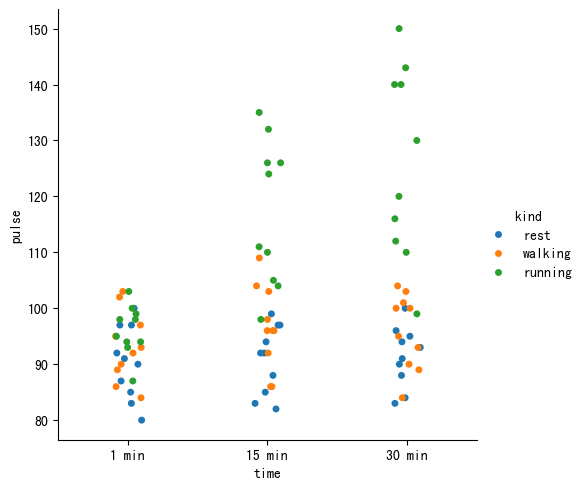

In [16]:
#1 base cat
sns.catplot(x='time',y='pulse',hue='kind',data=df)
plt.show()

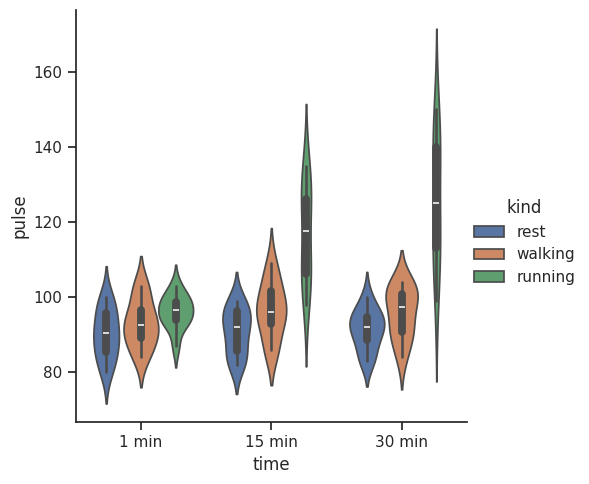

In [18]:
#2 kind='violin'
plt.close('all')
sns.set(style='ticks')
sns.catplot(x='time',y='pulse',hue='kind',data=df,kind='violin')
plt.show()

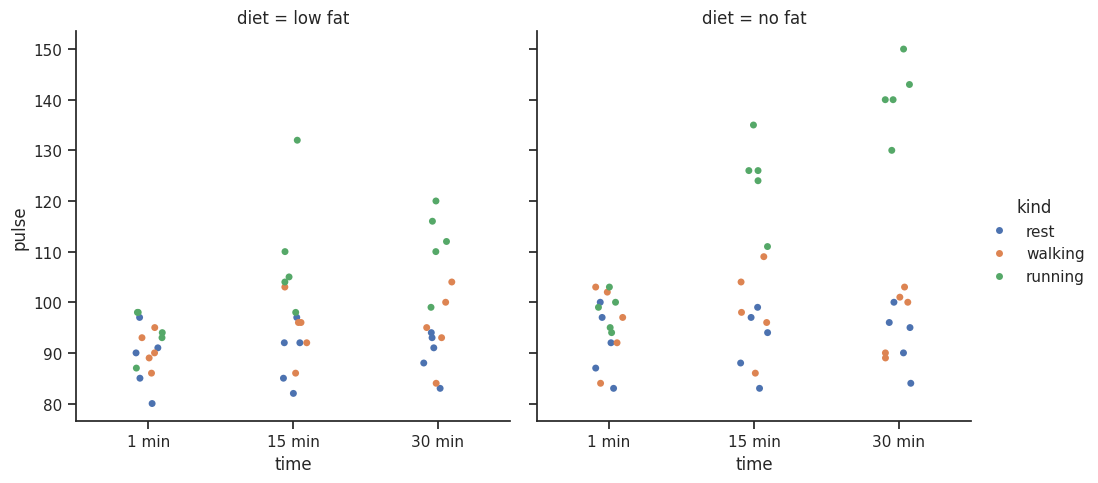

In [19]:
#3 hue='kind',col='diet'
plt.close('all')
sns.catplot(x='time',y='pulse',hue='kind',col='diet',data=df)
plt.show()

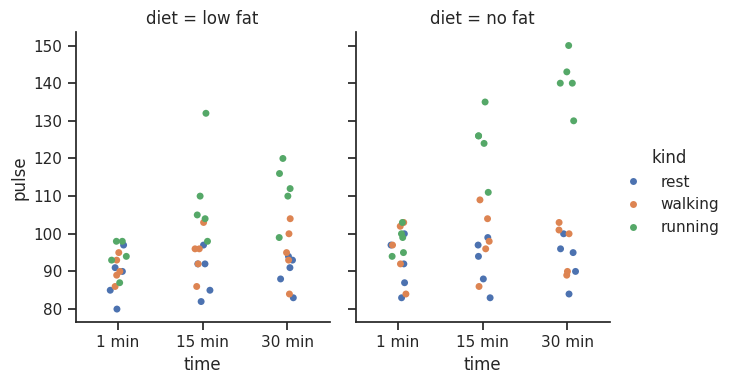

In [20]:
#4 height=4,aspect=.8
plt.close('all')
sns.catplot(x='time',y='pulse',hue='kind',col='diet',data=df,height=4,aspect=.8)
plt.show()



In [22]:
csv_name_titanic = 'titanic.csv'
dt = pd.read_csv(path+csv_name_titanic)
dt.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [23]:
print(dt.shape)
print(dt.columns)
dt.dtypes

(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [24]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [25]:
dt.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


In [26]:
dt.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.0000,891.0000,891,714.0000,891.0000,891.0000,891.0000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.3838,2.3086,NaN,29.6991,0.5230,0.3816,32.2042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.4866,0.8361,NaN,14.5265,1.1027,0.8061,49.6934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0000,1.0000,NaN,0.4200,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.0000,2.0000,NaN,20.1250,0.0000,0.0000,7.9104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.0000,3.0000,NaN,28.0000,0.0000,0.0000,14.4542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.0000,3.0000,NaN,38.0000,1.0000,0.0000,31.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
dt.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [28]:
dt = dt[dt.deck.notnull()]
dt.shape

(203, 15)

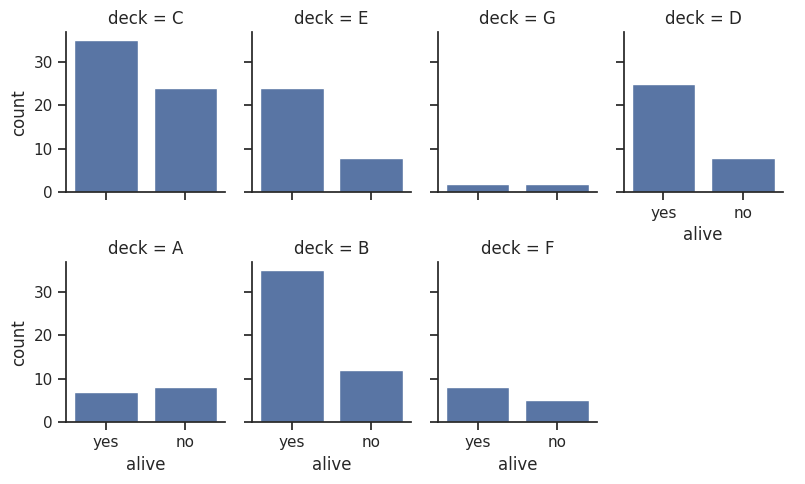

In [30]:
#5.kind='count' col_wrap=4 每行显示的列
plt.close('all')
sns.set(style='ticks')
sns.catplot(x='alive',col='deck',col_wrap=4,data=dt,kind='count',height=2.5,aspect=.8)
plt.show()

/tmp/ipykernel_299412/1089074987.py:3: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.catplot(x='age',y='embark_town',hue='sex',row='class',data=dt,orient='h',height=2,aspect=3,


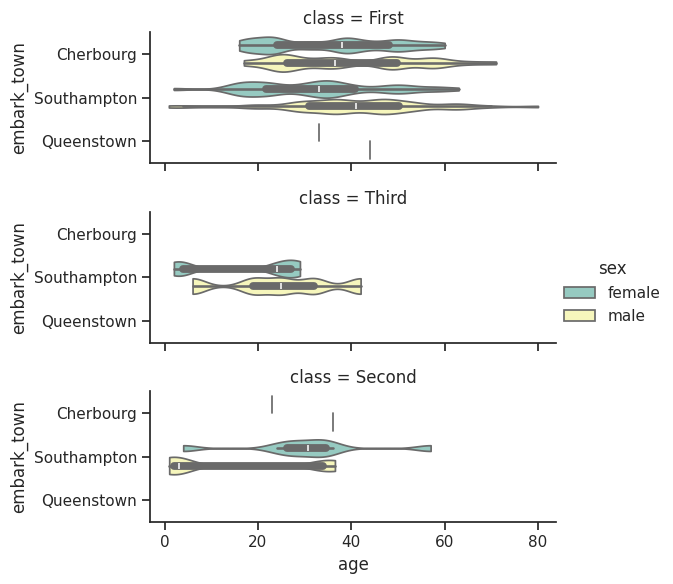

In [31]:
#6 kind='violin'
plt.close('all')
sns.catplot(x='age',y='embark_town',hue='sex',row='class',data=dt,orient='h',height=2,aspect=3,
            palette='Set3',kind='violin',dodge=True,cut=0,bw=.2)
plt.show()

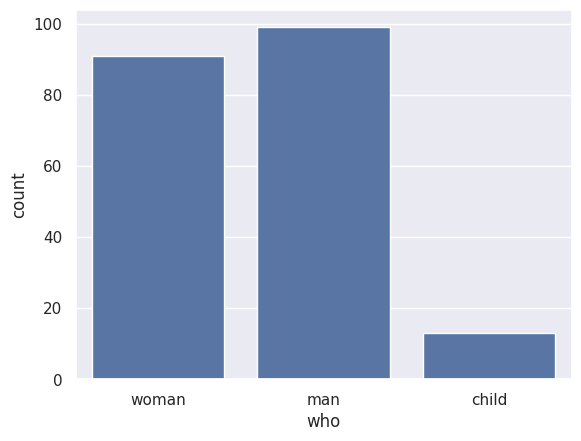

In [32]:
'''
sns.countplot(x=None,y=None,hue=None,data=None,order=None,hue_order=None,orient=None,
color=None,palette=None,saturation=0.75,dodge=True,ax=None,**kwargs)
orient:v|h 显示方向
saturation: float set color 饱和度
dodge:bool 使用色调嵌套时，是否沿分类轴移动元素
'''
# who
plt.close('all')
sns.set(style='darkgrid')
sns.countplot(x='who',data=dt)
plt.show()

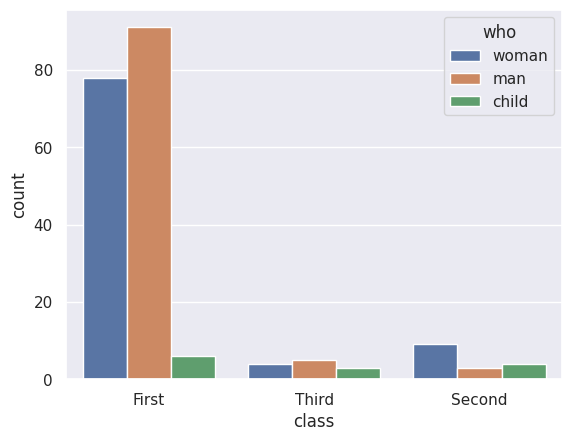

In [33]:
plt.close('all')
sns.countplot(x='class',hue='who',data=dt)
plt.show()

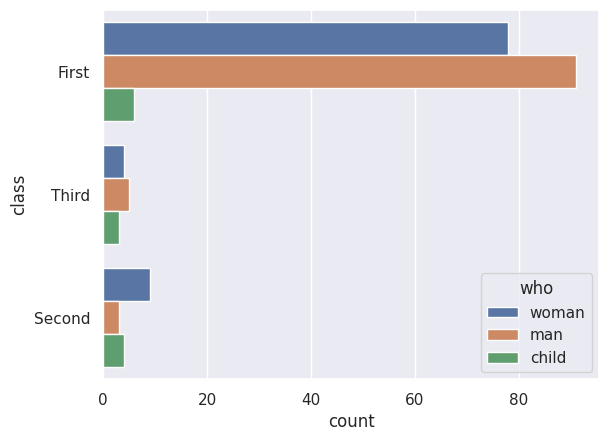

In [34]:
plt.close('all')
sns.countplot(y='class',hue='who',data=dt)
plt.show()

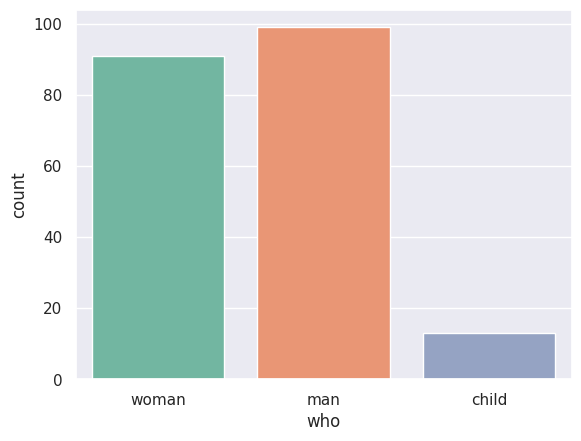

In [38]:
plt.close('all')
sns.countplot(x='who',hue='who',data=dt,palette='Set2')
plt.show()

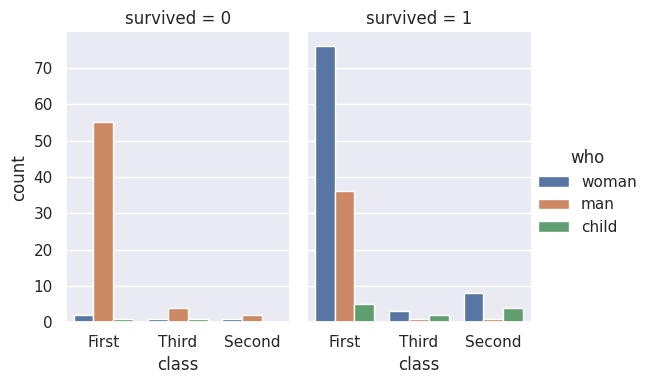

In [55]:
#kind='count'
plt.close('all')
sns.set(style='darkgrid')
sns.catplot(x='class',hue='who',col='survived',data=dt,
              kind='count',height=4,aspect=.7)
plt.show()

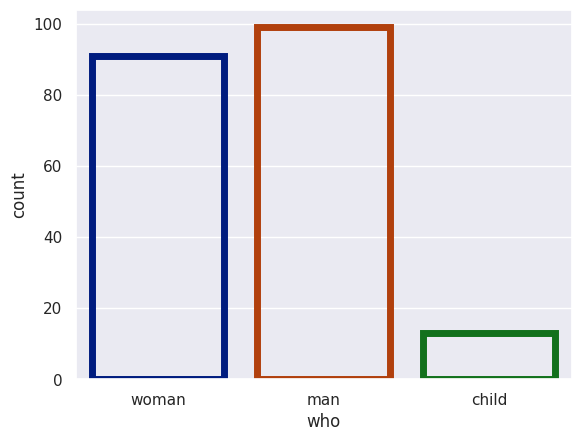

In [60]:
plt.close('all')
sns.set(style='darkgrid')
sns.countplot(x='who',data=dt,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette('dark',3))
plt.show()